In [ ]:
import pandas as pd
import sklearn.tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


1. Zapoznać się z danymi
2. Podzielić je train i test
3. Utworzyć obiekt algorytmu
4. Wyszkolić go na danych treningowych
5. Zrobić predykcję na zbiorze testowym
6. Zbadać r2 i MSE


In [ ]:
y = boston.target
X = data

In [ ]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
pd.DataFrame(y).describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
dtree = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
ypred = dtree.predict(X_test)

In [ ]:
ypred

array([27.9       , 34.17      , 17.46153846, 27.12352941, 19.76666667,
       22.71538462, 17.46153846, 15.86666667, 20.76111111, 22.71538462,
       19.76666667, 19.76666667,  8.03333333, 22.71538462, 19.70769231,
       25.39      , 17.46153846,  8.03333333, 47.96666667, 13.32727273,
       23.59090909, 23.59090909, 15.86666667, 27.6       , 13.32727273,
       13.32727273, 27.9       , 16.36      , 17.46153846, 22.71538462,
       19.76666667, 23.59090909, 25.39      , 19.70769231, 15.86666667,
       15.64444444, 36.98      , 22.75      , 21.22      , 23.59090909,
       21.22      , 27.6       , 47.96666667, 19.38333333, 20.075     ,
       13.32727273, 15.64444444, 23.59090909, 19.76666667, 34.17      ,
       19.38333333, 36.98      , 17.46153846, 27.6       , 47.96666667,
       20.76111111, 19.76666667, 27.12352941, 22.75      , 21.22      ,
       24.69333333, 33.54      , 34.17      , 18.9       , 27.12352941,
       13.48181818, 16.36      , 23.        , 27.12352941, 15.64

In [ ]:
r2_score(y_test, ypred)

0.7650921612754651

In [ ]:
mean_squared_error(y_test, ypred)

17.226680507685156

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.4-cp37-none-any.whl size=53568 sha256=fbe13ef016cb833fa935d1f088206a35042cb9c41ac3fffd7677d1cfd73bc857
  Stored in directory: /root/.cache/pip/wheels/6a/1b/01/8d804e4d3cf01cf38097a756b02c851a032c09e3a25feb7c50
Successfully built dtreeviz


In [ ]:
import dtreeviz.trees as dtv

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

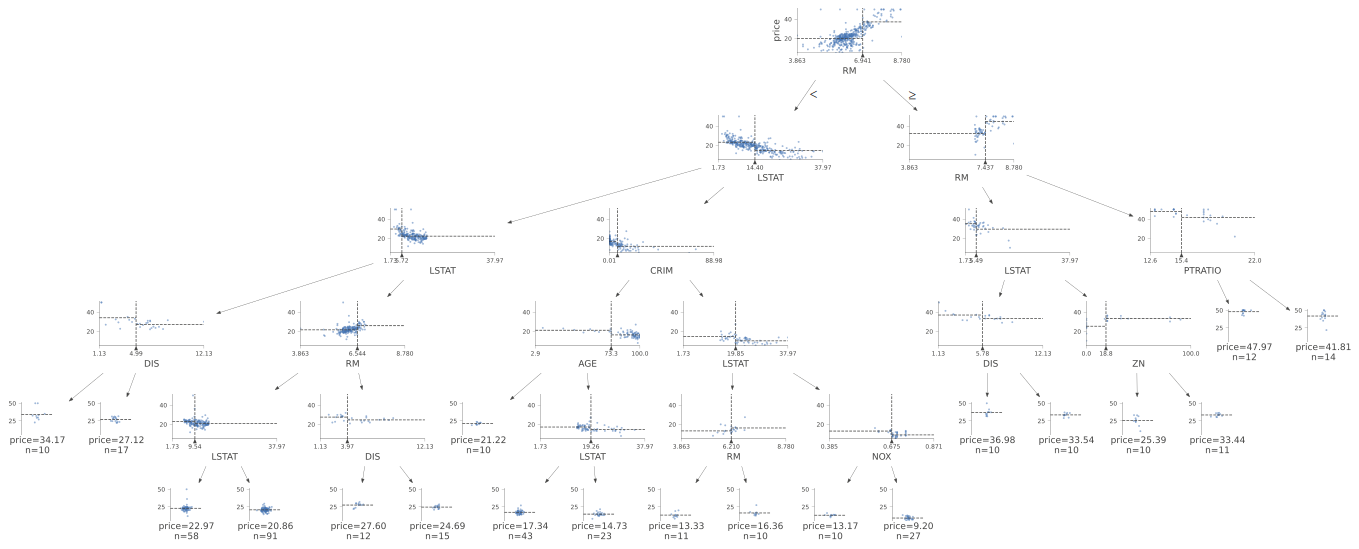

In [ ]:
dtv.dtreeviz(dtree, X_train, y_train, target_name='price', feature_names=X_train.columns)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=10, max_depth=5)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
r2_score(y_test, ypred)

0.9010784458112971

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

0.8724472927029858

In [ ]:
mean_squared_error(y_test, ypred)

9.353922578431376